# Fig: Alignment scores

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from figures.box import plot_box
pal_model, pal_cat = get_palette()

skip_fits = [
    'fixate2_nf-420_beta-0.15_(2023_04_27,13:57)',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15)',
]
kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

def _info(fit):
    info = fit.split('_')
    i = info.index([
        e for e in info
        if 'nf-' in e
    ].pop())
    category = info[i - 1]
    nf = int(info[i].split('-')[1])
    beta = info[i + 1].split('-')[1]
    try:
        beta = float(beta)
    except ValueError:
        beta = str(beta)
    tag = 'VAE' if 'vanilla' in info else 'cNVAE'
    if beta == 'ae':
        tag = tag.replace('V', '')
    return category, nf, beta, tag

In [3]:
path = pjoin(tmp_dir, 'neural_analysis')
print(sorted(os.listdir(path)))

[
    'fixate0_nf-280_beta-0.1_(2023_05_11,19:22).npy',
    'fixate0_nf-280_beta-0.5_(2023_05_11,20:35).npy',
    'fixate0_nf-280_beta-0.8_(2023_05_14,21:07).npy',
    'fixate0_nf-280_beta-1.0_(2023_05_08,15:10).npy',
    'fixate0_nf-280_beta-10.0_(2023_05_07,04:49).npy',
    'fixate0_nf-280_beta-2.0_(2023_05_07,04:16).npy',
    'fixate0_nf-280_beta-5.0_(2023_05_07,09:58).npy',
    'fixate1_nf-420_beta-0.001_(2023_05_16,00:03).npy',
    'fixate1_nf-420_beta-0.01_(2023_04_30,07:42).npy',
    'fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy',
    'fixate1_nf-420_beta-0.1_(2023_04_29,22:01).npy',
    'fixate1_nf-420_beta-0.2_(2023_04_30,21:37).npy',
    'fixate1_nf-420_beta-0.3_(2023_05_07,01:03).npy',
    'fixate1_nf-420_beta-0.4_(2023_05_07,02:37).npy',
    'fixate1_nf-420_beta-0.5_(2023_04_30,20:05).npy',
    'fixate1_nf-420_beta-0.6_(2023_04_30,20:36).npy',
    'fixate1_nf-420_beta-0.7_(2023_04_30,21:40).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_13,14:52).npy',
    'fixate1_nf-420_beta-0.9_(2023_05_07,05:51).npy',
    'fixate1_nf-420_beta-1.0_(2023_04_29,19:41).npy',
    'fixate1_nf-420_beta-1.5_(2023_05_08,14:55).npy',
    'fixate1_nf-420_beta-10.0_(2023_04_30,22:48).npy',
    'fixate1_nf-420_beta-2.0_(2023_05_07,07:27).npy',
    'fixate1_nf-420_beta-20.0_(2023_05_08,16:16).npy',
    'fixate1_nf-420_beta-5.0_(2023_05_07,08:59).npy',
    'fixate1_nf-420_beta-ae_(2023_05_12,07:31).npy',
    'fixate2_nf-420_beta-0.15_(2023_04_28,12:46).npy',
    'fixate2_nf-420_beta-0.5_(2023_05_03,08:39).npy',
    'fixate2_nf-420_beta-1.0_(2023_05_01,22:45).npy',
    'fixate2_nf-420_beta-5.0_(2023_05_15,08:46).npy',
    'obj1_nf-280_beta-0.15_(2023_04_26,15:53).npy',
    'obj1_nf-280_beta-0.1_(2023_05_14,08:28).npy',
    'obj1_nf-280_beta-0.5_(2023_05_04,11:11).npy',
    'obj1_nf-280_beta-0.8_(2023_05_14,22:09).npy',
    'obj1_nf-280_beta-1.0_(2023_05_04,10:27).npy',
    'obj1_nf-280_beta-10.0_(2023_05_12,21:30).npy',
    'obj1_nf-280_beta-2.0_(2023_05_13,20:52).npy',
    'obj1_nf-280_beta-5.0_(2023_05_15,07:20).npy',
    'transl1_nf-420_beta-0.01_(2023_05_04,09:38).npy',
    'transl1_nf-420_beta-0.15_(2023_04_27,13:00).npy',
    'transl1_nf-420_beta-0.3_(2023_05_04,11:11).npy',
    'transl1_nf-420_beta-0.5_(2023_05_02,15:00).npy',
    'transl1_nf-420_beta-0.8_(2023_05_04,12:46).npy',
    'transl1_nf-420_beta-1.0_(2023_05_02,22:02).npy',
    'transl1_nf-420_beta-10.0_(2023_05_04,09:20).npy',
    'transl1_nf-420_beta-5.0_(2023_05_15,16:32).npy',
    'transl2_nf-420_beta-0.15_(2023_04_27,19:16).npy',
    'transl2_nf-420_beta-0.5_(2023_05_03,10:12).npy',
    'transl2_nf-420_beta-1.0_(2023_05_02,00:19).npy',
    'vanilla_fixate1_nf-420_beta-0.001_(2023_05_16,08:26).npy',
    'vanilla_fixate1_nf-420_beta-0.01_(2023_05_13,21:48).npy',
    'vanilla_fixate1_nf-420_beta-0.15_(2023_05_02,15:15).npy',
    'vanilla_fixate1_nf-420_beta-0.1_(2023_05_10,21:14).npy',
    'vanilla_fixate1_nf-420_beta-0.2_(2023_05_10,23:41).npy',
    'vanilla_fixate1_nf-420_beta-0.3_(2023_05_13,07:46).npy',
    'vanilla_fixate1_nf-420_beta-0.4_(2023_05_11,19:25).npy',
    'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51).npy',
    'vanilla_fixate1_nf-420_beta-0.6_(2023_05_12,18:12).npy',
    'vanilla_fixate1_nf-420_beta-0.7_(2023_05_12,08:53).npy',
    'vanilla_fixate1_nf-420_beta-0.8_(2023_05_11,02:19).npy',
    'vanilla_fixate1_nf-420_beta-0.9_(2023_05_13,20:45).npy',
    'vanilla_fixate1_nf-420_beta-1.0_(2023_05_07,01:18).npy',
    'vanilla_fixate1_nf-420_beta-1.5_(2023_05_14,14:16).npy',
    'vanilla_fixate1_nf-420_beta-10.0_(2023_05_09,09:59).npy',
    'vanilla_fixate1_nf-420_beta-2.0_(2023_05_09,08:19).npy',
    'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23).npy',
    'vanilla_fixate1_nf-420_beta-ae_(2023_05_13,07:49).npy'
]

## Create df

In [4]:
df_align = collections.defaultdict(list)
for fit in tqdm(sorted(os.listdir(path))):
    if 'reservoir' in fit or fit in skip_fits:
        continue
    category, nf, beta, tag = _info(fit)    
    if beta in [0.001, 20.0]:
        continue

    # load npy
    results = np.load(
        pjoin(path, fit),
        allow_pickle=True,
    ).item()
    
    # get alignment scores
    for k, a in results['alignment_score'].items():
        _, expt, cell = k.split('_')
        df_align['model'].append(tag)
        df_align['category'].append(category)
        df_align['beta'].append(beta)
        df_align['nf'].append(nf)
        df_align['expt'].append(expt)
        df_align['cell'].append(int(cell))
        df_align['a'].append(a)

df_align = pd.DataFrame(df_align)
betas = ['ae'] + sorted([
    b for b in df_align['beta'].unique()
    if isinstance(b, float)
])

100%|██████████| 68/68 [18:09<00:00, 16.02s/it]


## Box

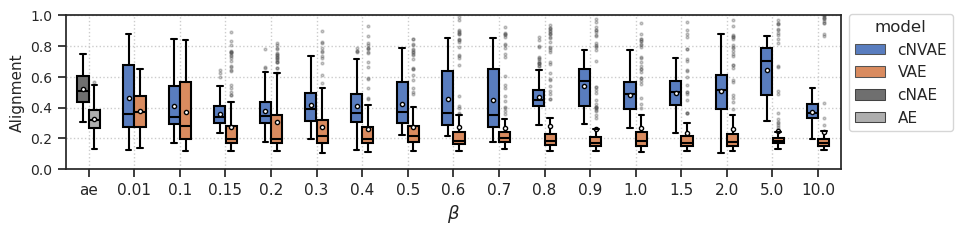

In [5]:
fig, ax = plot_box(df_align, 'a', 'Alignment')

In [6]:
fig.savefig(pjoin(fig_base_dir, 'neural_align.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'neural_align.png'), **kws_fig)

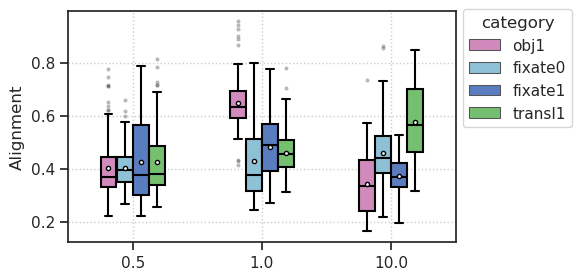

In [10]:
which_betas = [0.5, 1.0, 10.0]
_df1 = df_align.loc[
    (df_align['model'] == 'cNVAE') &
    (df_align['category'] != 'fixate2') &
    (df_align['beta'].isin(which_betas))
]
_pal1 = {
    k: v for k, v in pal_cat.items()
    if k in _df1['category'].unique()
}
fig, ax = create_figure(1, 1, (5, 3))
sns.boxplot(
    data=_df1,
    x='beta',
    y='a',
    hue='category',
    palette=_pal1,
    hue_order=_pal1,
    meanprops=props_mean,
    order=which_betas,
    ax=ax,
    **props_box,
)
ax.set_xlabel('')
ax.set_ylabel('Alignment')
sns.move_legend(ax, None, bbox_to_anchor=(1, 1.04))
# leg = ax.get_legend()
# if leg is not None:
#     leg.remove()
ax.grid()

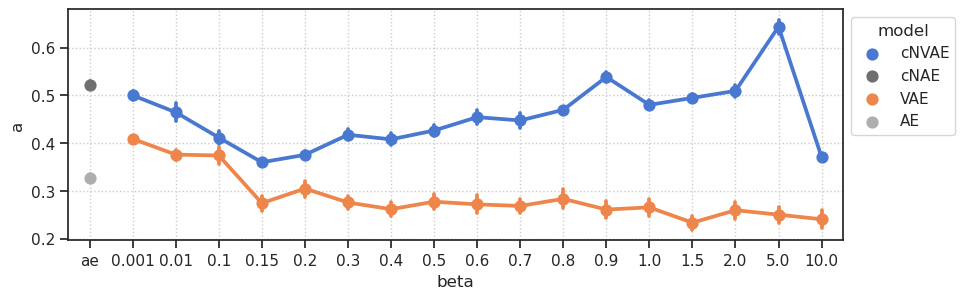

In [9]:
_df = df_align.loc[df_align['category'] == 'fixate1']

fig, ax = create_figure(1, 1, (10, 3))
sns.pointplot(
    data=_df,
    x='beta',
    y='a',
    hue='model',
    palette=pal_model,
    errorbar='se',
    order=betas,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()

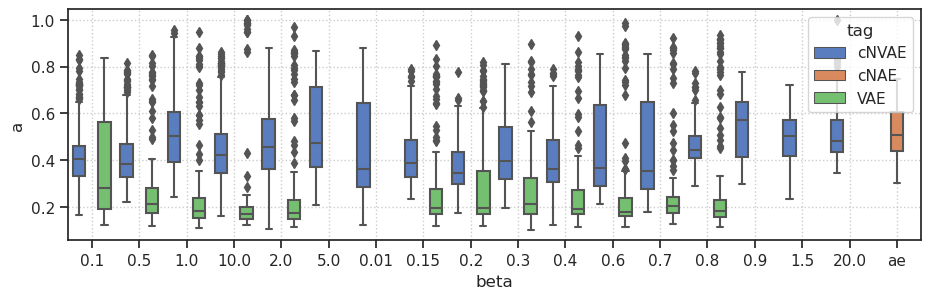

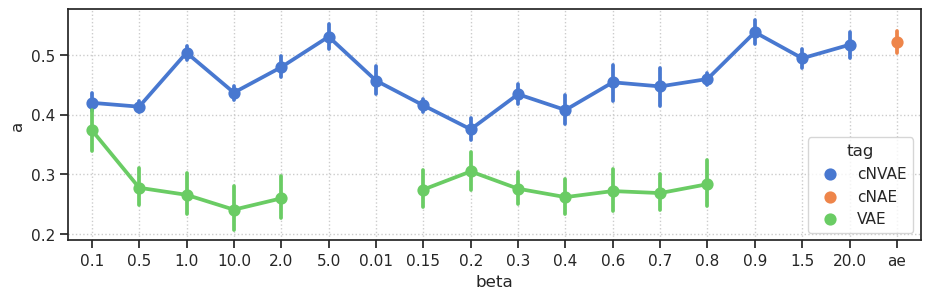

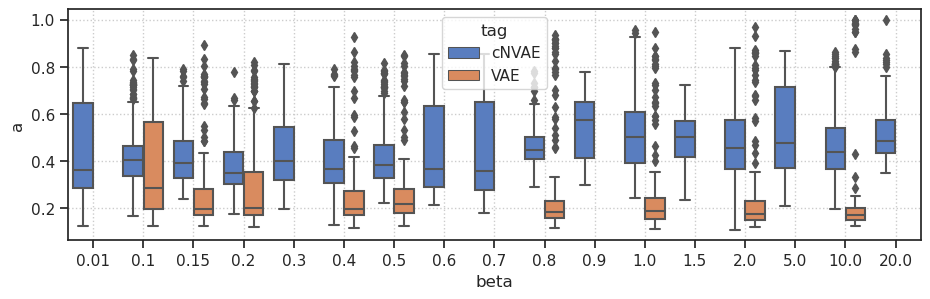

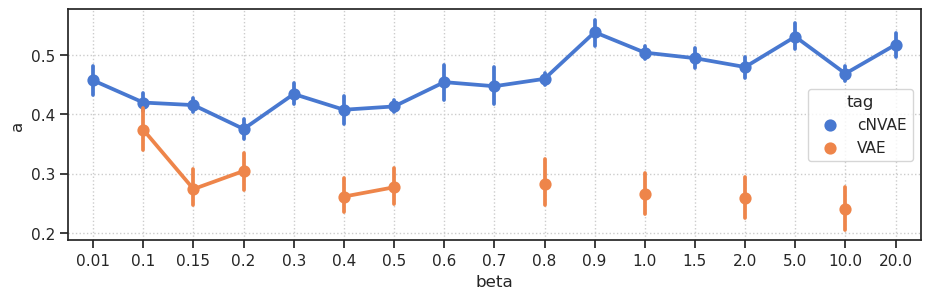

In [9]:
list(results)

['data',
 'pred',
 'pred_tst',
 'sta_model',
 'sta_spks',
 'perm_mu',
 'perm_sd',
 'alignment_score',
 'p_g_given_z',
 'p_z_given_neuron',
 'p_g_given_neuron',
 'labels']

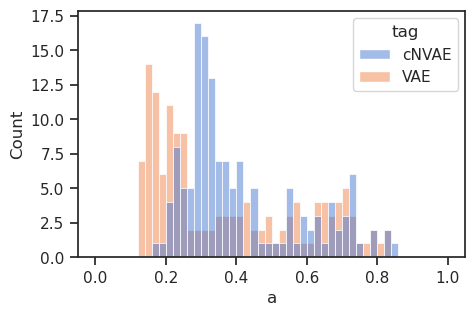

In [17]:
_df = df.loc[
    (df['beta'] == 0.1) &
    (df['category'] == 'fixate1')
]
sns.histplot(
    data=_df,
    x='a',
    hue='tag',
    palette='muted',
    bins=np.linspace(0, 1, 51),
);

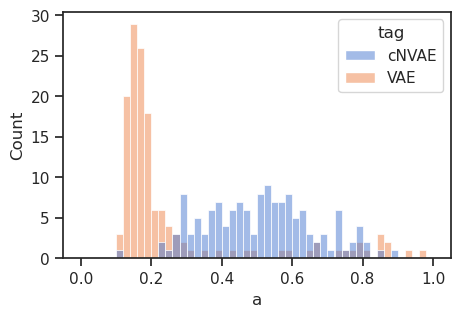

In [18]:
_df = df.loc[
    (df['beta'] == 2.0) &
    (df['category'] == 'fixate1')
]
sns.histplot(
    data=_df,
    x='a',
    hue='tag',
    palette='muted',
    bins=np.linspace(0, 1, 51),
);

In [19]:
_df = df.loc[
    (df['beta'] == 0.1) &
    (df['category'] == 'fixate1')
]
test = sp_stats.ttest_rel(
    a=_df.loc[_df['tag'] == 'cNVAE', 'a'].values,
    b=_df.loc[_df['tag'] == 'VAE', 'a'].values,
    alternative='greater',
)
test

Ttest_relResult(statistic=1.4821356706657018, pvalue=0.07027580646364412)

In [20]:
_df = df.loc[
    (df['beta'] == 0.2) &
    (df['category'] == 'fixate1')
]
test = sp_stats.ttest_rel(
    a=_df.loc[_df['tag'] == 'cNVAE', 'a'].values,
    b=_df.loc[_df['tag'] == 'VAE', 'a'].values,
    alternative='greater',
)
test

Ttest_relResult(statistic=3.9305124052070206, pvalue=6.636257636525163e-05)

In [11]:
fit = 'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51).npy'
results_vanilla = np.load(
    pjoin(path, fit),
    allow_pickle=True,
).item()

fit = 'fixate1_nf-420_beta-0.5_(2023_04_30,20:05).npy'
results = np.load(
    pjoin(path, fit),
    allow_pickle=True,
).item()

In [12]:
test = sp_stats.ttest_rel(
    a=list(results['alignment_score'].values()),
    b=list(results_vanilla['alignment_score'].values()),
    alternative='greater',
)
test

Ttest_relResult(statistic=7.6824449701635835, pvalue=1.230946161966216e-12)

In [38]:
def statistic(a, b):
    return np.mean(a - b)


test = sp_stats.permutation_test(
    data=(
        list(results['alignment_score'].values()),
        list(results_vanilla['alignment_score'].values())),
    n_resamples=int(1e6),
    permutation_type='samples',
    alternative='two-sided',
    statistic=statistic,
    random_state=0,
)

In [40]:
test.statistic, test.pvalue

(0.14913383690169152, 1.999998000002e-06)

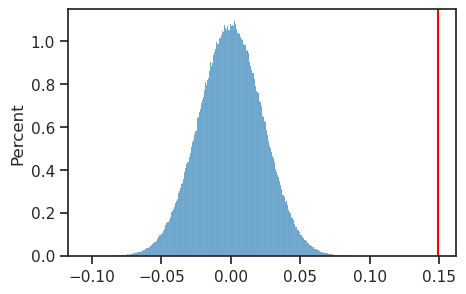

In [46]:
sns.histplot(test.null_distribution, stat='percent')
plt.axvline(test.statistic, color='r');